In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error
from Forecast_functions import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import adfuller

from Forecast_functions import *

In [28]:
df = pd.read_csv('Sales Forecasting data.csv', index_col=[0])

<Axes: xlabel='Date'>

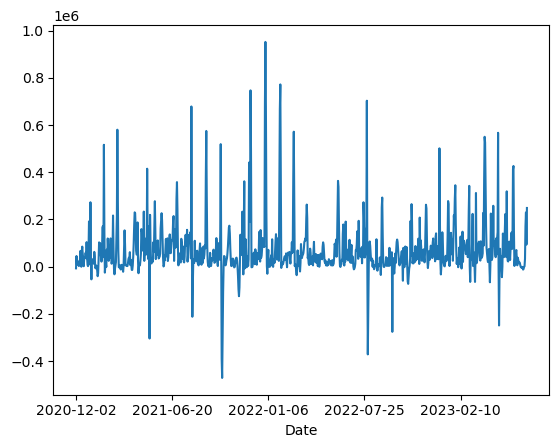

In [29]:
df['Sales_Value'].plot()

In [30]:
df['Lag7'] = df['Sales_Value'].shift(7)

In [31]:
data = df['Lag7'].iloc[7:]

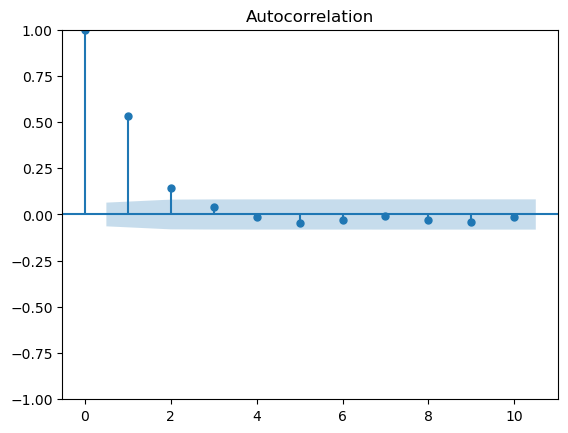

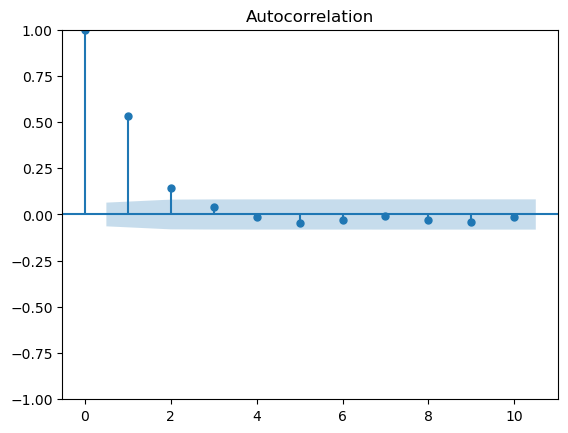

In [32]:
plot_acf(data, lags = 10)

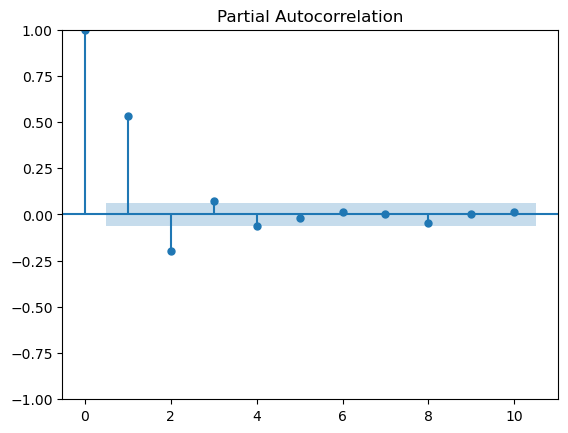

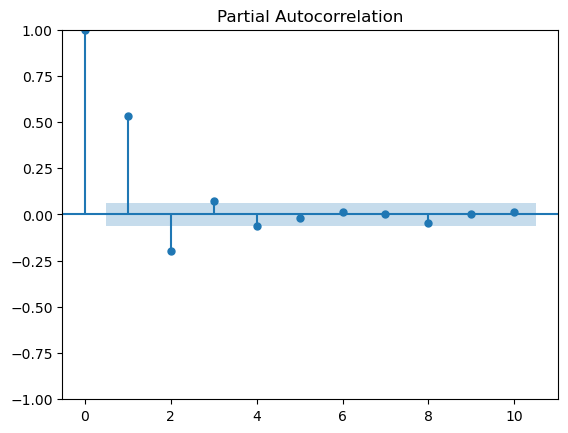

In [33]:
plot_pacf(data, lags = 10)

In [34]:
train_size = int(data.shape[0]*0.80)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [35]:
model = ARIMA(data, order = (1, 0, 2)).fit()

C:\Users\FQ467WA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\FQ467WA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\FQ467WA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [16]:
pred = model.predict(start = len(train), end = len(train)+len(test)-1)

In [24]:
def arima(data, train_size, p, d, q):
    
    train_siz = int(data.shape[0]*train_size)
    train, test = data.iloc[:train_siz], data.iloc[train_siz:]

    model = ARIMA(data, order = (p, d, q)).fit()

    pred = model.predict(start = len(train), end = len(train)+len(test)-1)

    plt.plot(pred.values, c='r', ls = '--', label = "Preds",  alpha = 0.8)
    plt.plot(test.values, alpha = 0.3, label = 'Actual')
    plt.legend()

    print('Root Mean Square Error: ', np.sqrt(mean_squared_error(pred, test.values)))
    
    return pred

C:\Users\FQ467WA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\FQ467WA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\FQ467WA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Root Mean Square Error:  98368.62966459073


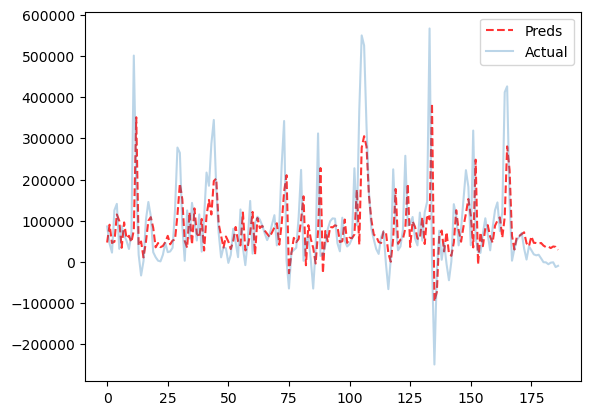

In [26]:
pred = arima(data, 0.8, 1,0,2)

In [37]:
File_path = 'Sales Data.txt'
ProductCodes = [7000158, 7000043, 7000157, 7000022, 7003399]
plants = ['Bangalore New CFA', 'Delhi CFA', 'Zirakpur CFA']
Sales_Channels = ['CP-GT', 'RETAIL', 'CP-NMT']
models = ['arima', 'sarimax', 'rnn']

In [38]:
df = select_df(File_path= 'Sales Data.txt', ProductCode=ProductCodes[1], 
              PlantCode=plants[0], Sales_Channel=Sales_Channels[0],freq='D')

C:\Disk D\Forecasting Models\Python Notebooks\Forecast_functions.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample(freq).mean()


In [39]:
df

,ProductCode,Plant,Sales_Qty,Sales_Value,Dates
Date,,,,,
2020-12-01,7000043.0,7029.0,36.000000,1465.210000,2020-12-01
2020-12-02,7000043.0,7029.0,-36.000000,-1471.690000,2020-12-02
2020-12-03,7000043.0,7029.0,1404.000000,54811.870000,2020-12-03
2020-12-04,7000043.0,7029.0,355.000000,14275.240000,2020-12-04
2020-12-05,7000043.0,7029.0,288.000000,11721.580000,2020-12-05
...,...,...,...,...,...
2023-06-24,7000043.0,7029.0,1259.000000,71062.470000,2023-06-24
2023-06-25,7000043.0,7029.0,3109.251774,176049.198996,2023-06-25
2023-06-26,7000043.0,7029.0,3384.000000,191978.750000,2023-06-26


Enter seasonality period: 7


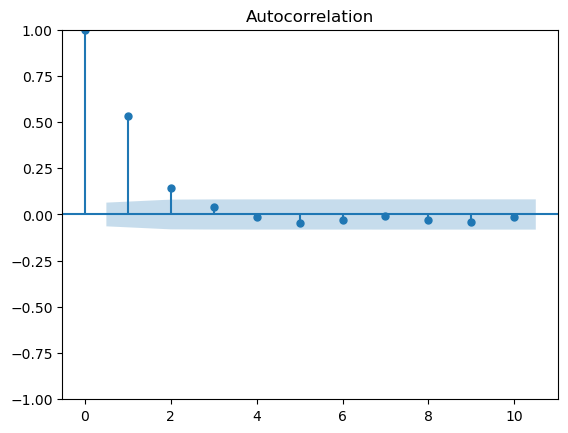

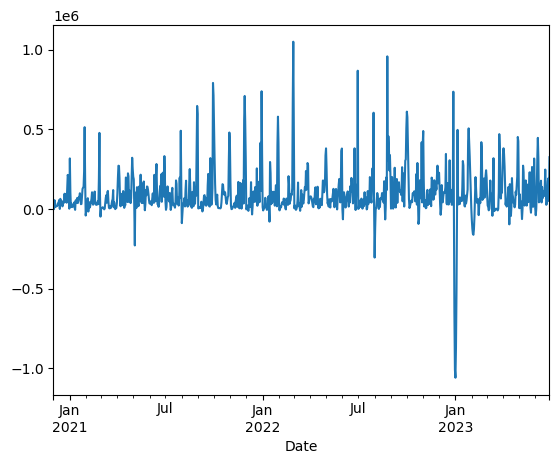

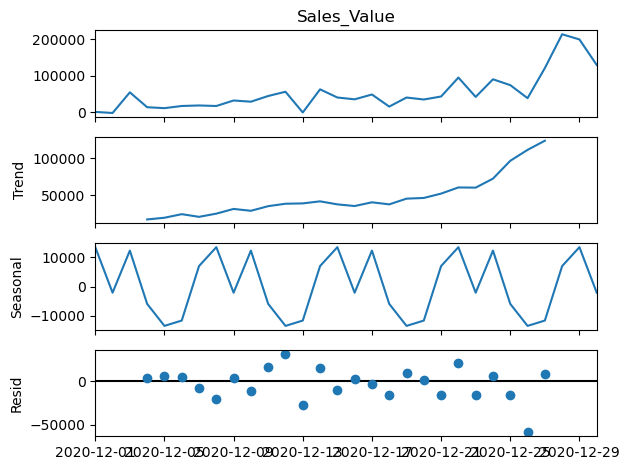

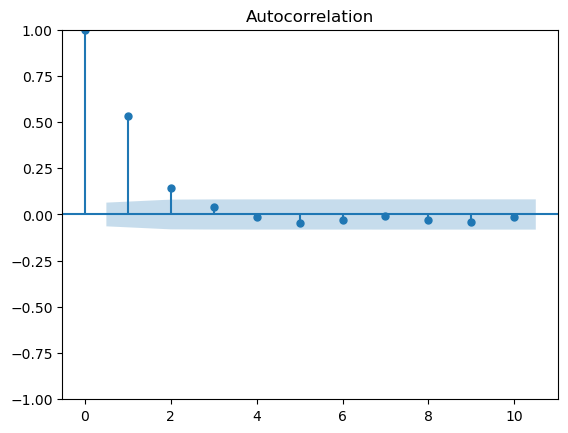

In [47]:
df['Sales_Value'].plot()

seasonal_decompose(df['Sales_Value'].iloc[:30]).plot()

df['Lag7'] = df['Sales_Value'].shift(int(input('Enter seasonality period: ')))

plot_acf(data, lags = 10)

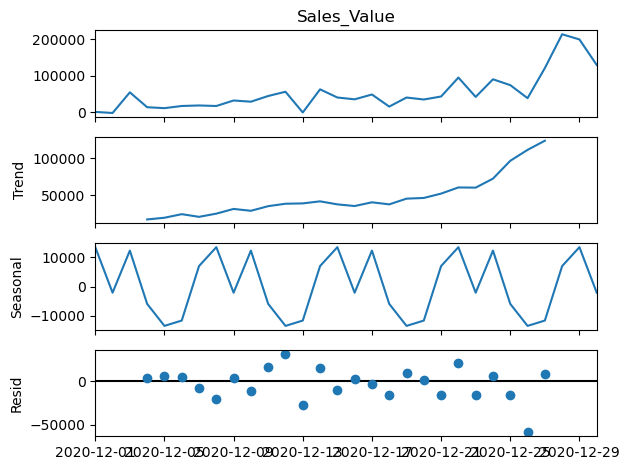

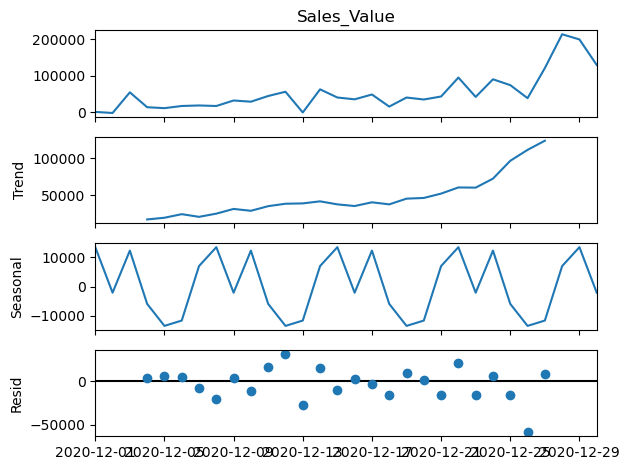

In [44]:
seasonal_decompose(df['Sales_Value'].iloc[:30]).plot()